In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import wocemaps


In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
# this only needs to be created once per Jupyter session
gcs = gcsfs.GCSFileSystem(token='anon')

# Sea Surface Salinity ssp126

In [6]:
sos_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
sos_zarr = sos_data.zstore.values[-1]

In [8]:
# create a mutable-mapping-style interface to the store
mapper_sos = gcs.get_mapper(sos_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_sos_126 = xr.open_zarr(mapper_sos, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP126 Salinity Graphs

In [ ]:
baseline_salinity_first_years = gfdl_esm4_sos_126.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_salinity_last_years = gfdl_esm4_sos_126.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

Text(0.5, 0, 'Longitude')

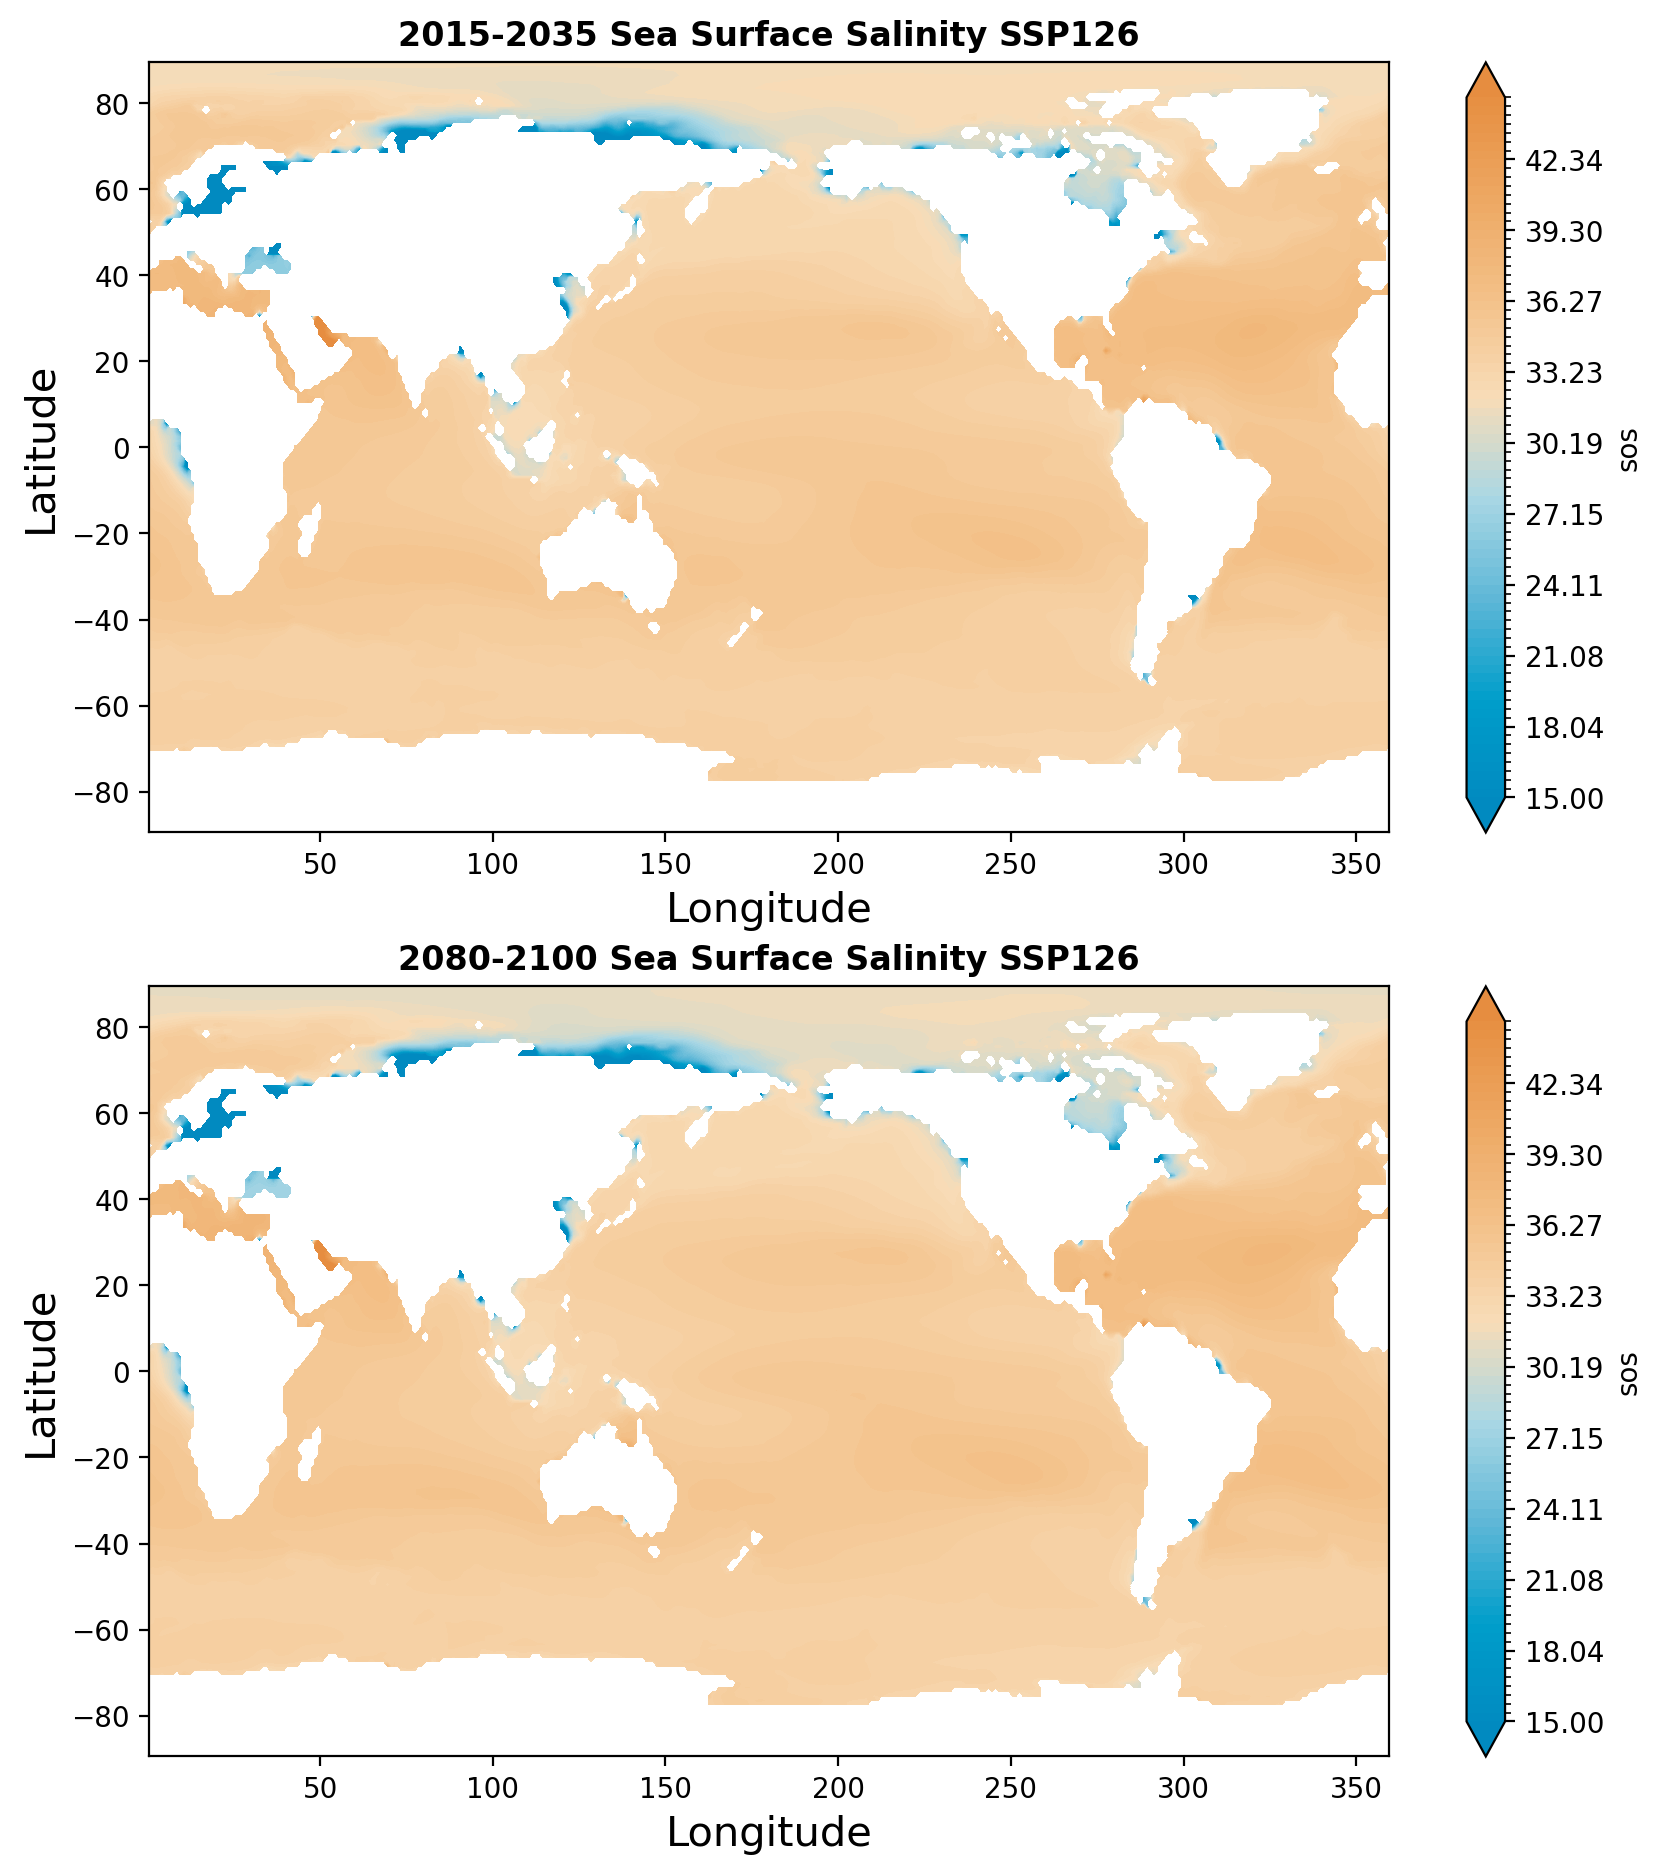

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (10,11))
baseline_salinity_first_years.plot.contourf(ax=ax1, cmap=wocemaps.salinity, levels=80, vmin=15, vmax=45)
baseline_salinity_last_years.plot.contourf(ax=ax2, cmap=wocemaps.salinity, levels=80, vmin=15, vmax=45)

ax1.set_title("2015-2035 Average Sea Surface Salinity SSP126", fontweight='bold')
ax2.set_title('2080-2100 Average Sea Surface Salinity SSP126', fontweight='bold')

                               
ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 1.0, 'Sea Surface Salinity Anomalies SSP126')

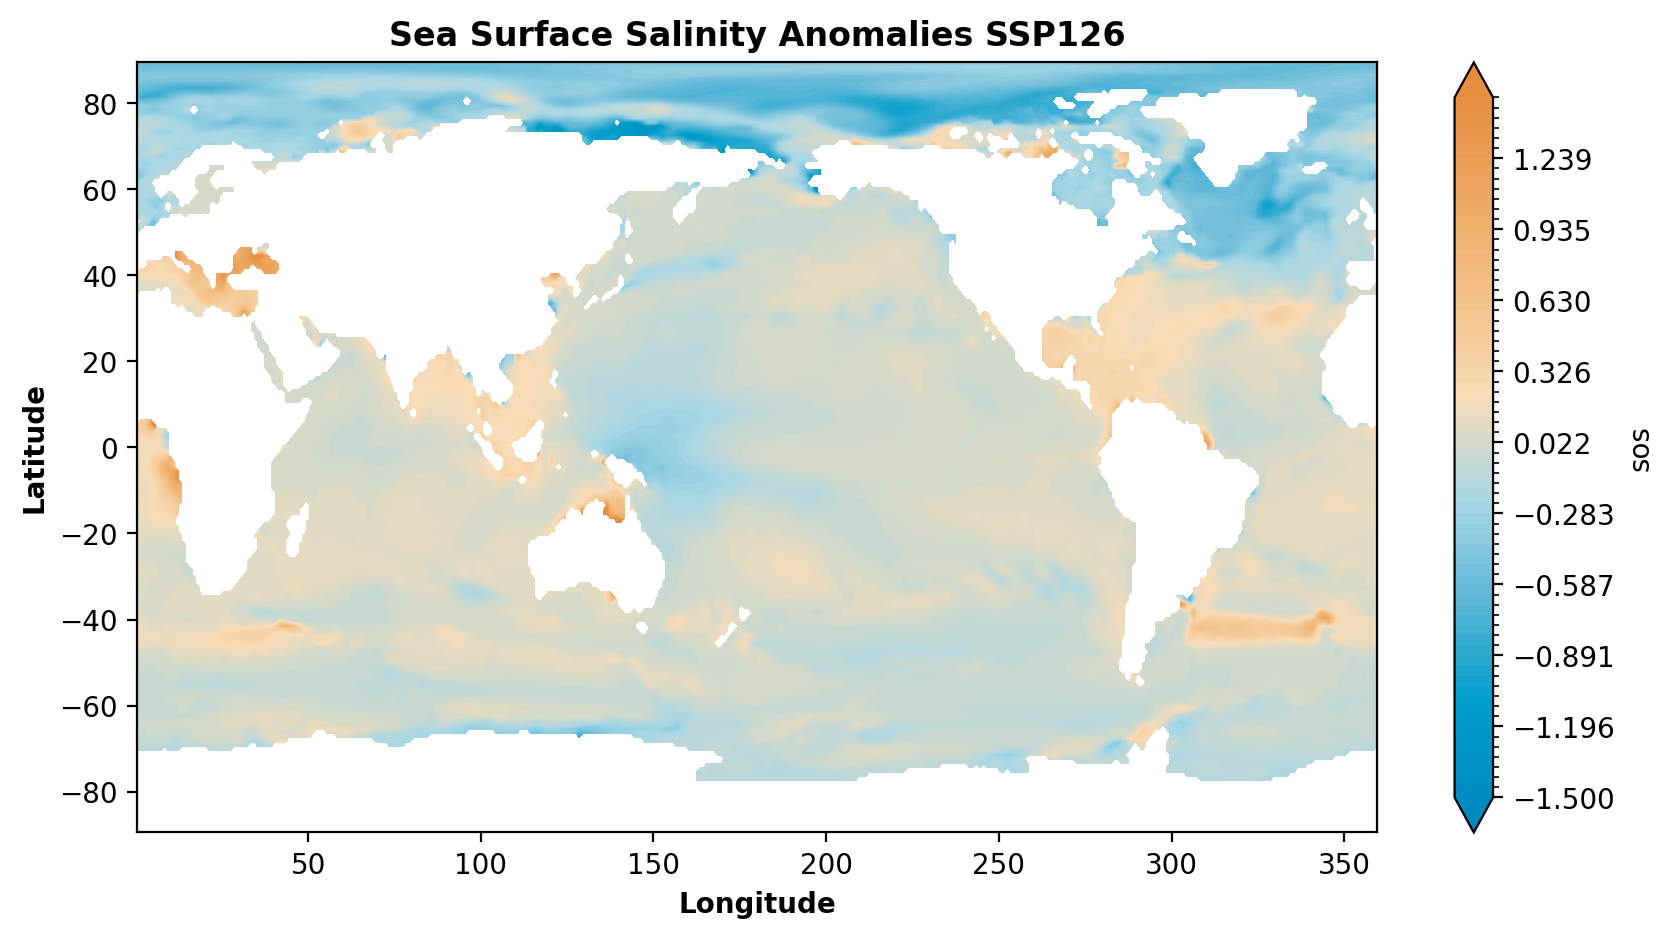

In [86]:
baseline_difference = baseline_salinity_last_years - baseline_salinity_first_years
fig, ax0  = plt.subplots(figsize=(10,5))
baseline_difference.plot.contourf(ax=ax0, cmap=wocemaps.salinity, vmin=-1.5, vmax=1.5, levels=70)
ax0.set_ylabel('Latitude',fontweight='bold')
ax0.set_xlabel('Longitude',fontweight='bold')
plt.title("Sea Surface Salinity Anomalies SSP126", fontweight='bold')

# Sea Surface Salinity ssp585

In [12]:
sos_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
sos_585_zarr = sos_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_sos = gcs.get_mapper(sos_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_sos = xr.open_zarr(mapper_585_sos, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_585_sos

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

## SSP585 Salinity Graphs

In [91]:
baseline_salinity_first_years_585 = gfdl_esm4_585_sos.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_salinity_last_years_585 = gfdl_esm4_585_sos.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

Text(0.5, 0, 'Longitude')

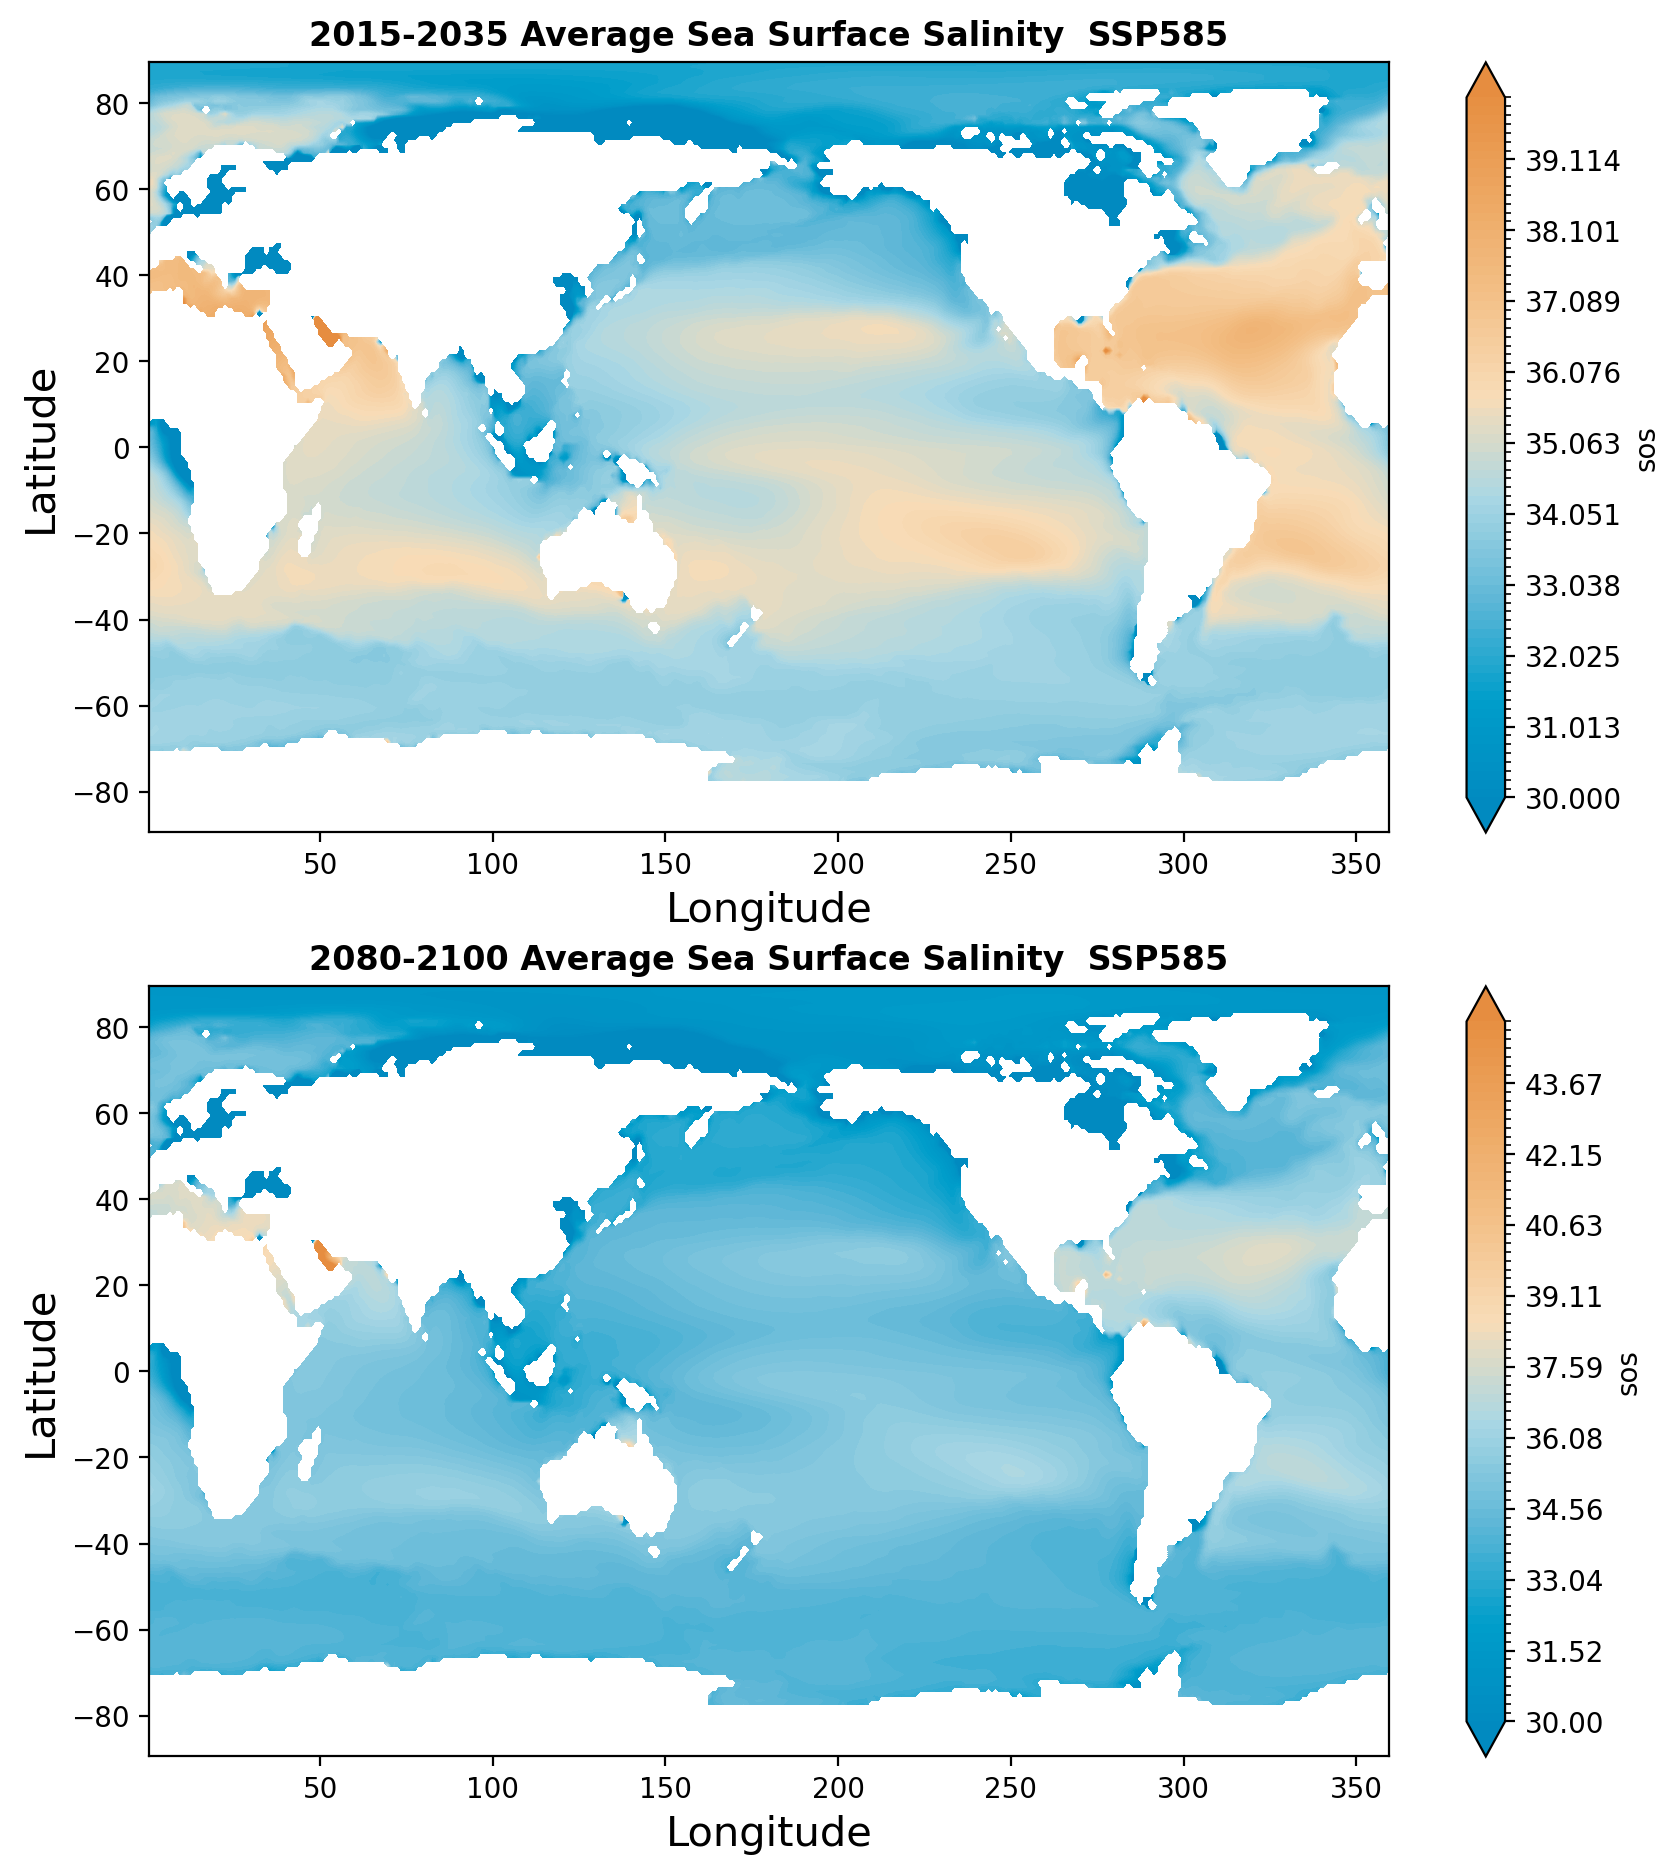

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (10,11))
baseline_salinity_first_years_585.plot.contourf(ax=ax1, cmap=wocemaps.salinity, levels=80, vmin=30, vmax=40)
baseline_salinity_last_years_585.plot.contourf(ax=ax2, cmap=wocemaps.salinity, levels=80, vmin=30, vmax=45)

ax1.set_title("2015-2035 Average Sea Surface Salinity  SSP585", fontweight='bold')
ax2.set_title('2080-2100 Average Sea Surface Salinity  SSP585', fontweight='bold')

                               
ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 1.0, 'Sea Surface Salinity Anomalies SSP585')

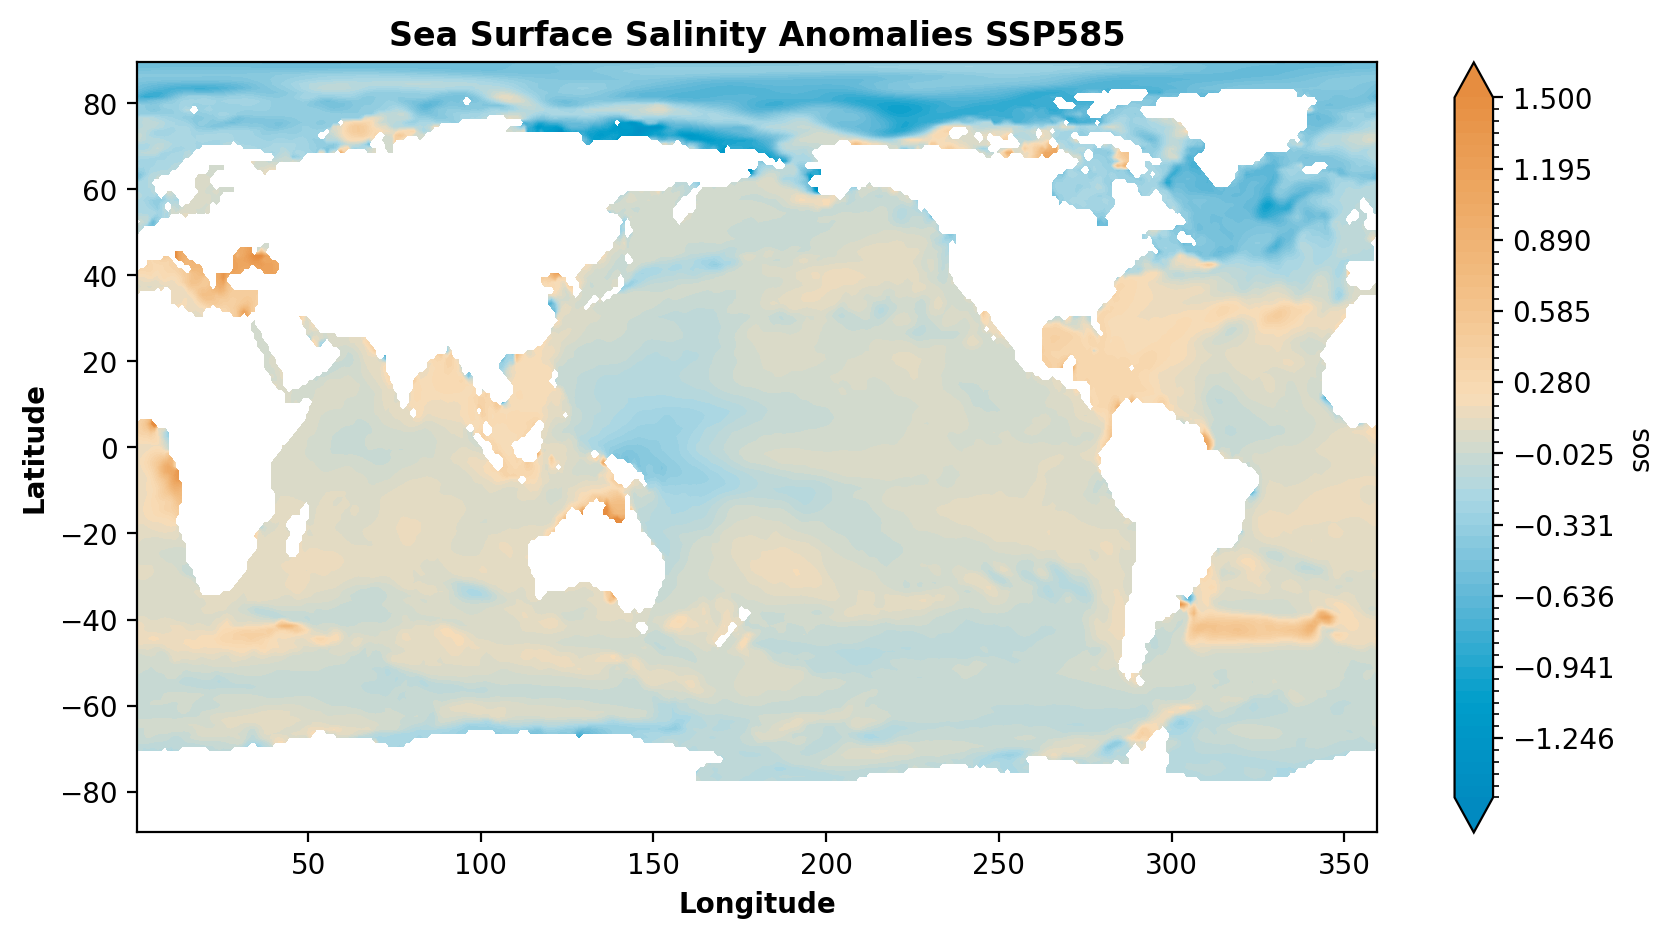

In [96]:
baseline_difference_585 = baseline_salinity_last_years_585 - baseline_salinity_first_years_585
fig, ax0  = plt.subplots(figsize=(10,5))
baseline_difference_585.plot.contourf(ax=ax0, vmin=-1.5, vmax=1.5, levels=60, cmap=wocemaps.salinity)
ax0.set_ylabel('Latitude',fontweight='bold')
ax0.set_xlabel('Longitude',fontweight='bold')
plt.title("Sea Surface Salinity Anomalies SSP585", fontweight='bold')

# Monthly Precipitation ssp126

In [16]:
pr_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
pr_126_zarr = pr_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_pr = gcs.get_mapper(pr_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_pr = xr.open_zarr(mapper_126_pr, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Monthly Precipitation ssp585

In [17]:
pr_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
pr_585_zarr = pr_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_pr = gcs.get_mapper(pr_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_pr = xr.open_zarr(mapper_585_pr, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_585_pr

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

# Monthly water vapor content 126

In [18]:
wv_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
wv_126_zarr = wv_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_wv = gcs.get_mapper(wv_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_wv = xr.open_zarr(mapper_126_wv, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

# Monthly water vapor content 585

In [19]:
wv_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
wv_585_zarr = wv_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_wv = gcs.get_mapper(wv_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_wv = xr.open_zarr(mapper_585_wv, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## Evaporation including sublimination and transpiration

In [22]:
evap_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
evap_126_zarr = evap_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_evap = gcs.get_mapper(evap_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_evap = xr.open_zarr(mapper_126_evap, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP126 Evaporation Graphs

In [99]:
baseline_evap_first_years = gfdl_esm4_126_evap.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_evap_last_years = gfdl_esm4_126_evap.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

Text(0.5, 0, 'Longitude')

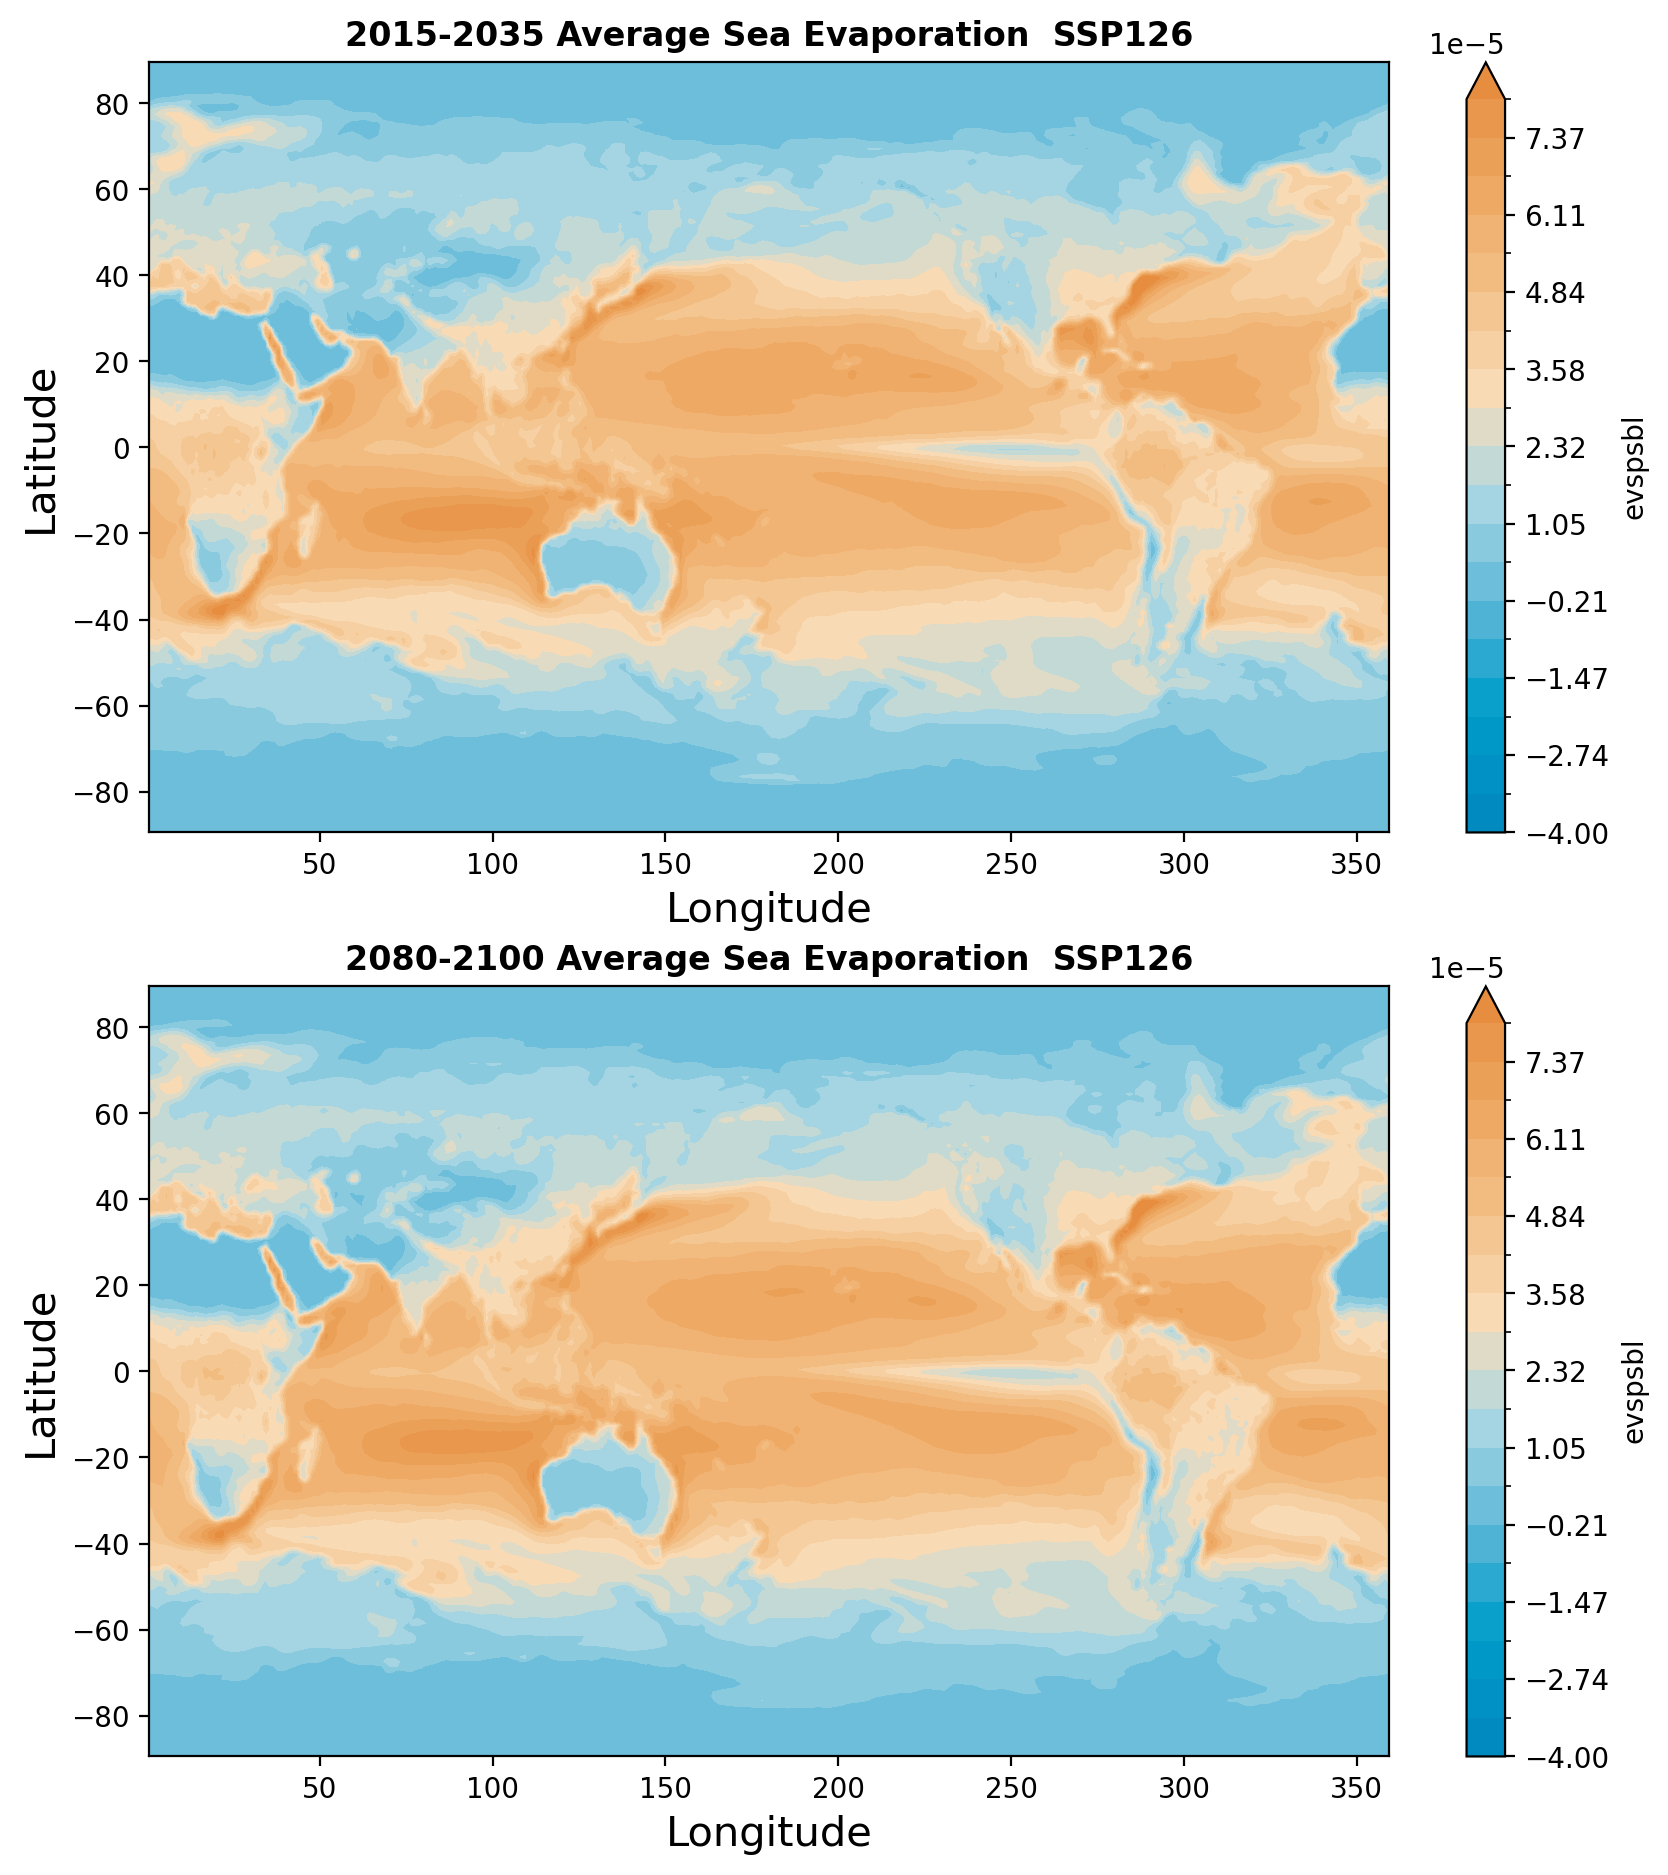

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (10,11))
baseline_evap_first_years.plot.contourf(ax=ax1, cmap=wocemaps.salinity,  levels=20, vmin=-0.00004, vmax=0.00008)
baseline_evap_last_years.plot.contourf(ax=ax2, cmap=wocemaps.salinity,levels=20, vmin=-0.00004, vmax=0.00008)

ax1.set_title("2015-2035 Average Evaporation  SSP126", fontweight='bold')
ax2.set_title('2080-2100 Average Evaporation  SSP126', fontweight='bold')

                               
ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 1.0, 'SSP126 Evaporation Anomalies')

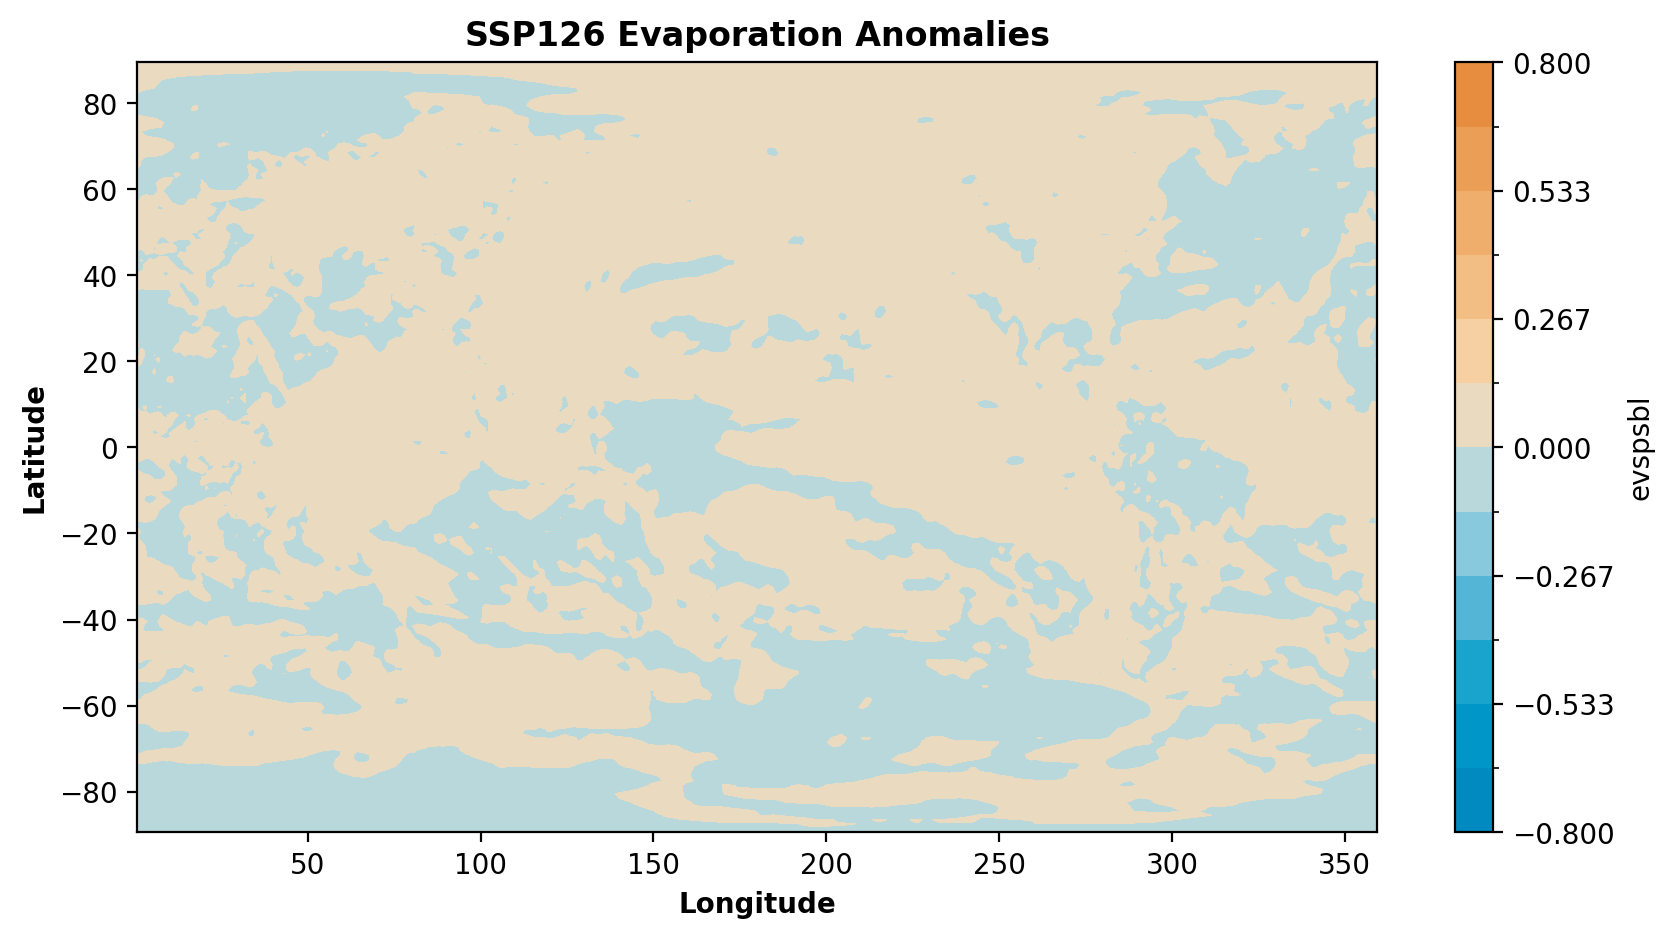

In [101]:
difference_evap_126 = baseline_evap_last_years - baseline_evap_first_years
fig, ax0  = plt.subplots(figsize=(10,5))
difference_evap_126.plot.contourf(ax=ax0,cmap=wocemaps.salinity, vmin=-0.8, vmax=0.8, levels=13)
ax0.set_ylabel('Latitude',fontweight='bold')
ax0.set_xlabel('Longitude',fontweight='bold')
plt.title("SSP126 Evaporation Anomalies", fontweight='bold')

## Evaporation including sublimination and transpiration 585

In [60]:
evap_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
evap_585_zarr = evap_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_evap = gcs.get_mapper(evap_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_evap = xr.open_zarr(mapper_585_evap, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## SSP585 Evaporation Graphs

In [103]:
baseline_evap_first_years_585 = gfdl_esm4_585_evap.sel(time=slice('2015-01-16', '2035-01-01')).mean(dim='time')
baseline_evap_last_years_585 = gfdl_esm4_585_evap.sel(time=slice('2080-12-16', '2100-12-16')).mean(dim='time')

Text(0.5, 0, 'Longitude')

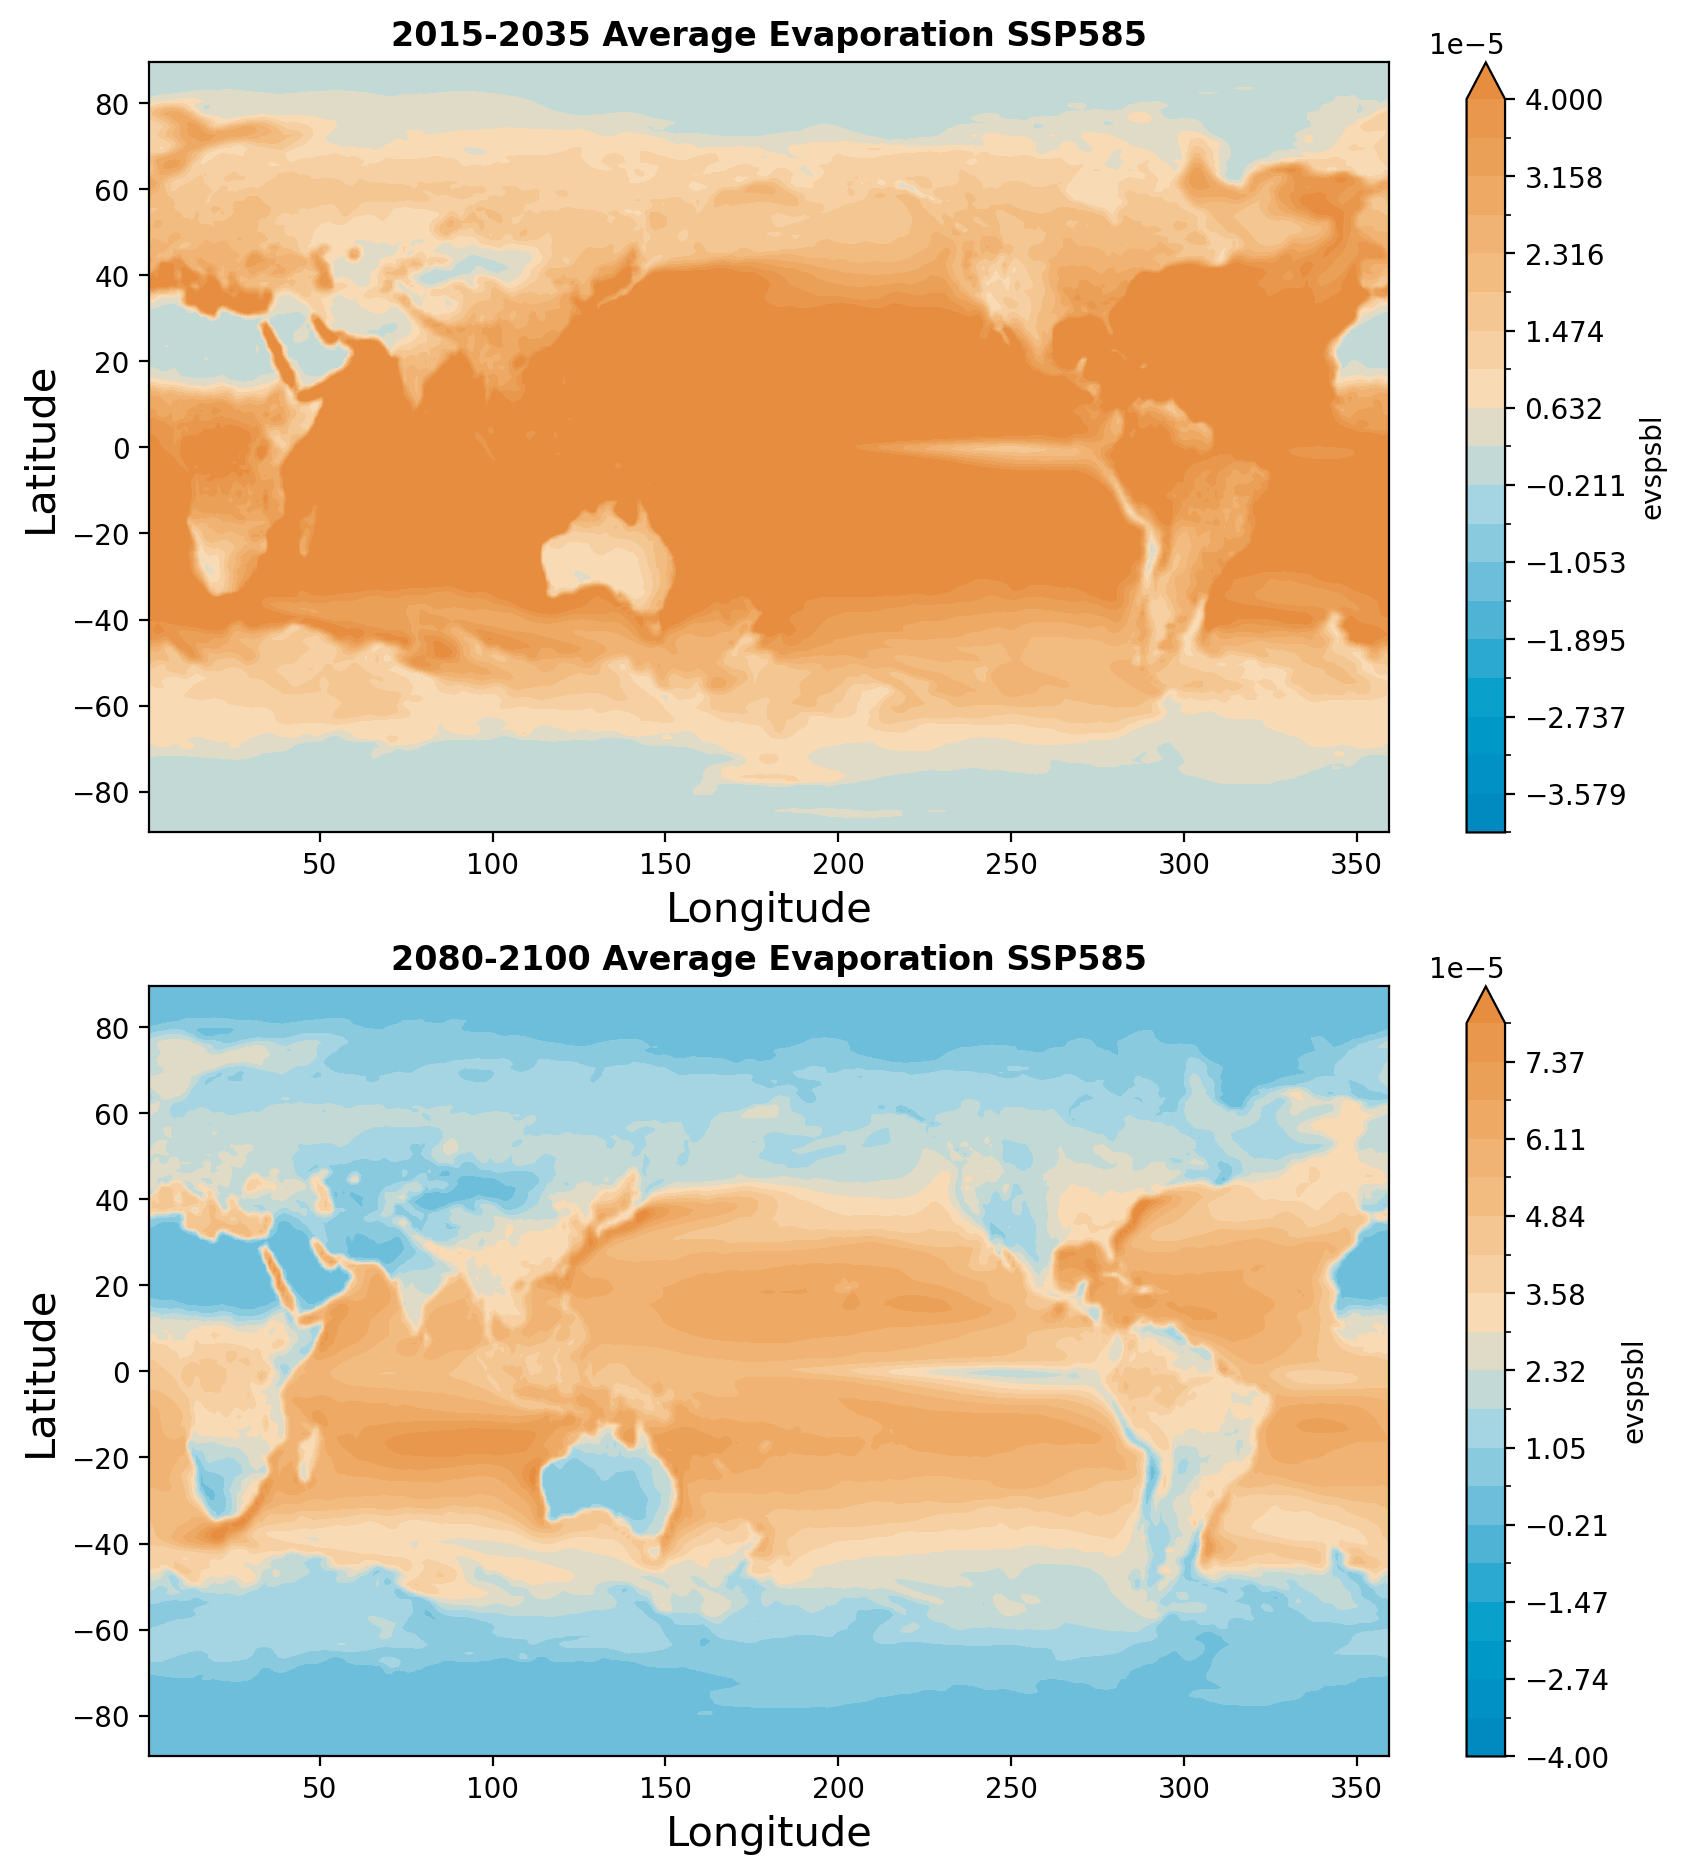

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (10,11))
baseline_evap_first_years_585.plot.contourf(ax=ax1, cmap=wocemaps.salinity,vmin=-0.00004, vmax=0.00004, levels=20)
baseline_evap_last_years_585.plot.contourf(ax=ax2, cmap=wocemaps.salinity, vmin=-0.00004, vmax=0.00008, levels=20)

ax1.set_title("2015-2035 Average Evaporation SSP585", fontweight='bold')
ax2.set_title('2080-2100 Average Evaporation SSP585', fontweight='bold')

                               
ax1.set_ylabel('Latitude', fontsize = 15)
ax1.set_xlabel('Longitude', fontsize = 15)

ax2.set_ylabel('Latitude', fontsize = 15)
ax2.set_xlabel('Longitude', fontsize = 15)

Text(0.5, 1.0, 'Evaporation Anomalies ssp 585')

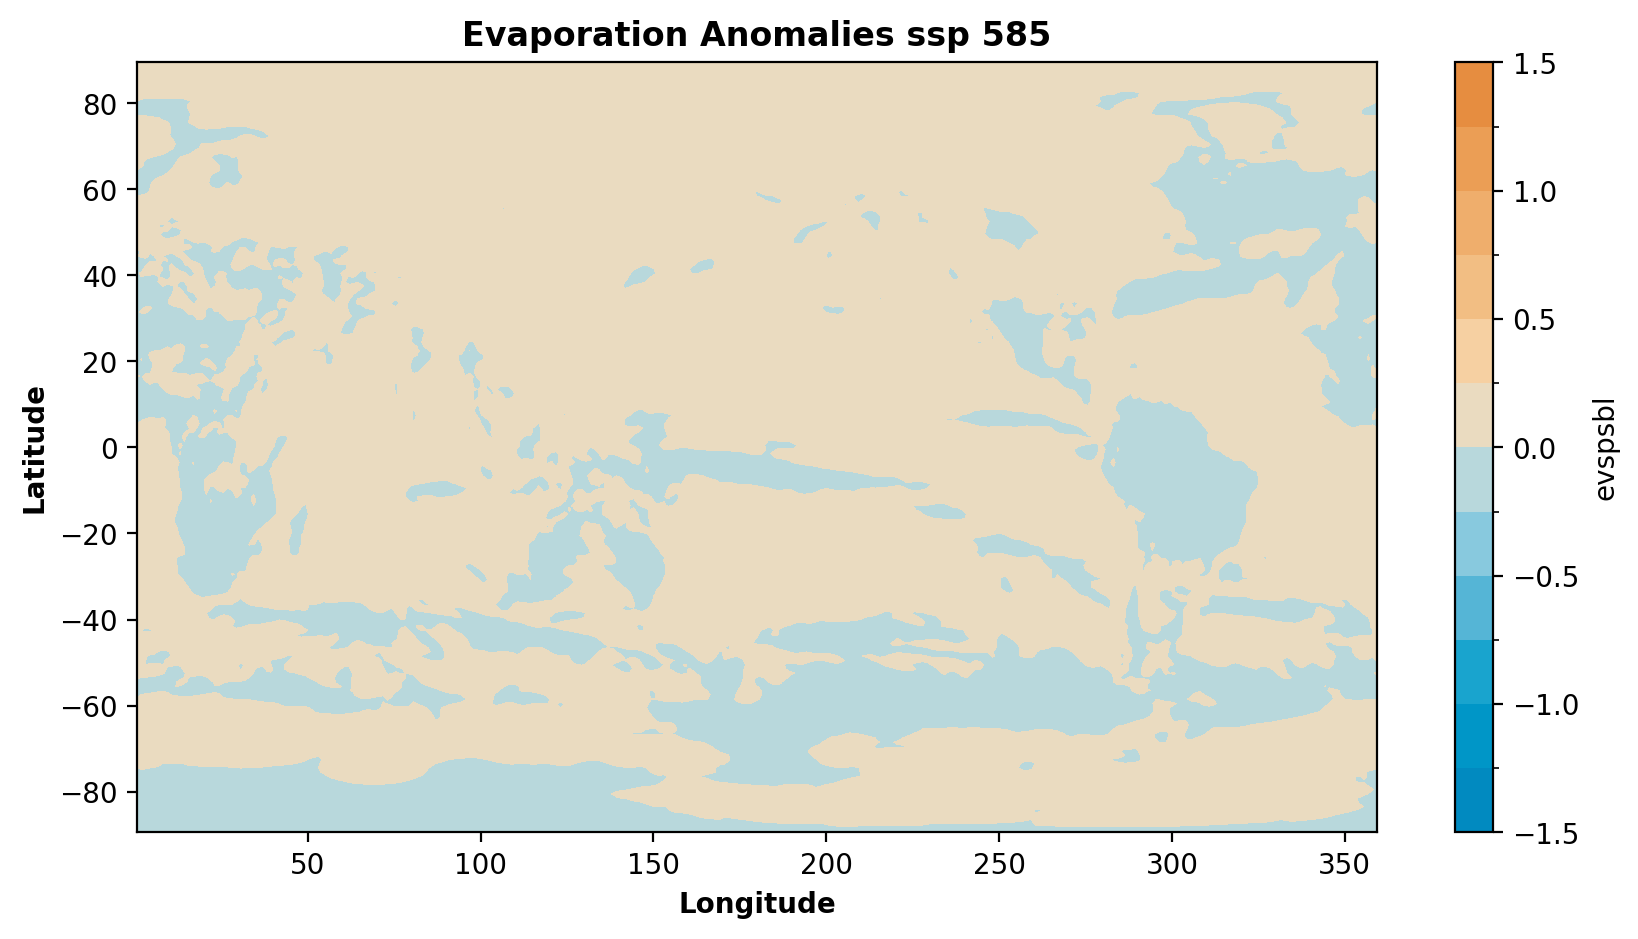

In [105]:
difference_evap_585 = baseline_evap_last_years_585 - baseline_evap_first_years_585
fig, ax0  = plt.subplots(figsize=(10,5))
difference_evap_585.plot.contourf(ax=ax0,cmap=wocemaps.salinity, vmin=-1.5, vmax=1.5, levels=13)
ax0.set_ylabel('Latitude',fontweight='bold')
ax0.set_xlabel('Longitude',fontweight='bold')
plt.title("Evaporation Anomalies ssp 585", fontweight='bold')

## Snow fall flux 585

In [19]:
snow_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
snow_585_zarr = snow_ssp585_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_585_snow = gcs.get_mapper(snow_585_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_585_snow = xr.open_zarr(mapper_585_snow, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})

## Snow fall flux 126

In [16]:
snow_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
snow_126_zarr = snow_ssp126_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_126_snow = gcs.get_mapper(snow_126_zarr)
# open the dataset using xarray and zarr
gfdl_esm4_126_snow = xr.open_zarr(mapper_126_snow, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})